# EDA
Questo notebook verrà usato per l'exploratory data analysis non comprensiva di machine learning

In [19]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
from pyecharts.charts import Pie
from pyecharts import options as opts


from functions import *



### Per usare multi cartelle (cookiecutter)
#import sys
#sys.path.append('./../src')
#print(sys.path)

In [11]:
#Importiamo il database dei tweets

df=pd.read_csv("data/processed/twitter_final.csv")
df=gpd.GeoDataFrame(df)   #Usare diretto Geopandas crasha il kernel...

#col_list = list(df)
#col_list[6], col_list[5] = col_list[5], col_list[6]

df

,month,day,hours,temperature,rain,municipal,geometry
0,11,1,0.0,13.2,0.0,Trento,POINT (11.13 46.07)
1,11,1,0.0,8.4,0.0,Pinzolo,POINT (10.83 46.23)
2,11,1,0.5,8.8,0.0,Cavalese,POINT (11.46 46.29)
3,11,1,0.5,13.2,0.0,Rovereto,POINT (11.04 45.89)
4,11,1,0.5,11.8,0.0,San Michele all'Adige,POINT (11.12 46.2)
...,...,...,...,...,...,...,...
27936,12,31,0.0,-7.7,0.0,Vigo di Fassa,POINT (11.68 46.42)
27937,12,29,13.0,3.4,0.0,Predazzo,POINT (11.6 46.31)
27938,11,19,0.5,5.0,0.0,Sant'Orsola Terme,POINT (11.3 46.11)
27939,11,23,9.5,0.7,0.0,Sant'Orsola Terme,POINT (11.3 46.11)


# Plots

AttributeError: 'list' object has no attribute 'get'

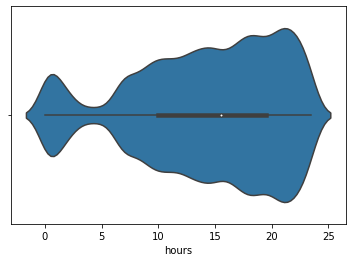

In [25]:
#Plot occurences versus tempo 
sns.violinplot(data=df, x="hours")
#Risultato ovvio: la gente twitta meno di notte che di giorno, verso la serva sembra essere il momento preferito
#Vista la ciclicità del notte-giorno, il violin vien molto brutto; andiam di Nightingale

#print(list(df["hours"]))


rosechart = Pie()

rosechart.add("", [list(z) for z in zip(c, d)],
        radius=["20%", "95%"],  # 20% inside radius，95% ourside radius
        center=["30%", "60%"],   # center of the chart
        rosetype="area")
#Plot occurences versus temperatura
#sns.violinplot(data=df, x="temperature")



In [15]:
print(df["hours"].unique())

[ 0.   0.5  1.   1.5  2.   2.5  4.5  7.5  8.   8.5  9.   9.5 10.  10.5
 11.  11.5 12.5 13.5 12.  13.  14.  14.5 15.  15.5 16.  16.5 17.  17.5
 18.5 18.  19.5 19.  20.  22.  21.  20.5 21.5 22.5 23.  23.5  7.   5.5
  6.5  3.   6.   3.5  4.   5. ]


# Weather

In [4]:
"""
#Fallisce ad importare
weather=m_d.safe_import("weather")
weather
#Come prima ho metadati
"""
weather_json = json.load( open(m_d.data_path / m_d.files['weather'][0]) )
weather = gpd.GeoDataFrame(weather_json['features'])


#Elimino le colonne del vento (dati molto incompleti)
weather.drop(weather.columns[list(range(202,298))], axis=1, inplace=True)
weather.drop(columns=['minWind', "maxWind"], inplace=True)

#Svolgiamo infine i punti geometrici
weather['geometry'] = weather['geomPoint.geom'].apply(lambda x:Point(x['coordinates'][0], x['coordinates'][1]))
weather.drop(columns=['geomPoint.geom'],inplace=True)

pd.set_option('display.max_columns', None)
weather.head(5)



,station,elevation,date,timestamp,minTemperature,maxTemperature,precipitation,temperatures.0000,temperatures.0015,temperatures.0030,temperatures.0045,temperatures.0100,temperatures.0115,temperatures.0130,temperatures.0145,temperatures.0200,temperatures.0215,temperatures.0230,temperatures.0245,temperatures.0300,temperatures.0315,temperatures.0330,temperatures.0345,temperatures.0400,temperatures.0415,temperatures.0430,temperatures.0445,temperatures.0500,temperatures.0515,temperatures.0530,temperatures.0545,temperatures.0600,temperatures.0615,temperatures.0630,temperatures.0645,temperatures.0700,temperatures.0715,temperatures.0730,temperatures.0745,temperatures.0800,temperatures.0815,temperatures.0830,temperatures.0845,temperatures.0900,temperatures.0915,temperatures.0930,temperatures.0945,temperatures.1000,temperatures.1015,temperatures.1030,temperatures.1045,temperatures.1100,temperatures.1115,temperatures.1130,temperatures.1145,temperatures.1200,temperatures.1215,temperatures.1230,temperatures.1245,temperatures.1300,temperatures.1315,temperatures.1330,temperatures.1345,temperatures.1400,temperatures.1415,temperatures.1430,temperatures.1445,temperatures.1500,temperatures.1515,temperatures.1530,temperatures.1545,temperatures.1600,temperatures.1615,temperatures.1630,temperatures.1645,temperatures.1700,temperatures.1715,temperatures.1730,temperatures.1745,temperatures.1800,temperatures.1815,temperatures.1830,temperatures.1845,temperatures.1900,temperatures.1915,temperatures.1930,temperatures.1945,temperatures.2000,temperatures.2015,temperatures.2030,temperatures.2045,temperatures.2100,temperatures.2115,temperatures.2130,temperatures.2145,temperatures.2200,temperatures.2215,temperatures.2230,temperatures.2245,temperatures.2300,temperatures.2315,temperatures.2330,temperatures.2345,precipitations.0000,precipitations.0015,precipitations.0030,precipitations.0045,precipitations.0100,precipitations.0115,precipitations.0130,precipitations.0145,precipitations.0200,precipitations.0215,precipitations.0230,precipitations.0245,precipitations.0300,precipitations.0315,precipitations.0330,precipitations.0345,precipitations.0400,precipitations.0415,precipitations.0430,precipitations.0445,precipitations.0500,precipitations.0515,precipitations.0530,precipitations.0545,precipitations.0600,precipitations.0615,precipitations.0630,precipitations.0645,precipitations.0700,precipitations.0715,precipitations.0730,precipitations.0745,precipitations.0800,precipitations.0815,precipitations.0830,precipitations.0845,precipitations.0900,precipitations.0915,precipitations.0930,precipitations.0945,precipitations.1000,precipitations.1015,precipitations.1030,precipitations.1045,precipitations.1100,precipitations.1115,precipitations.1130,precipitations.1145,precipitations.1200,precipitations.1215,precipitations.1230,precipitations.1245,precipitations.1300,precipitations.1315,precipitations.1330,precipitations.1345,precipitations.1400,precipitations.1415,precipitations.1430,precipitations.1445,precipitations.1500,precipitations.1515,precipitations.1530,precipitations.1545,precipitations.1600,precipitations.1615,precipitations.1630,precipitations.1645,precipitations.1700,precipitations.1715,precipitations.1730,precipitations.1745,precipitations.1800,precipitations.1815,precipitations.1830,precipitations.1845,precipitations.1900,precipitations.1915,precipitations.1930,precipitations.1945,precipitations.2000,precipitations.2015,precipitations.2030,precipitations.2045,precipitations.2100,precipitations.2115,precipitations.2130,precipitations.2145,precipitations.2200,precipitations.2215,precipitations.2230,precipitations.2245,precipitations.2300,precipitations.2315,precipitations.2330,precipitations.2345,geometry
0,T0071,905,2013-11-01,1383260400,4.5,12.3,False,8.4,8.3,8.2,8.1,8.2,8.2,8.3,8.1,8.0,7.7,7.5,7.6,7.8,7.8,7.5,7.0,6.6,6.1,6.3,6.1,5.7,5.7,5.0,4.9,4.9,4.7,4.9,5.0,5.0,4.5,4.8,4.9,4.6,5.1,5.0,5.1,5.5,5.4,5.9,7.0,7.5,7.7,8.6,9.1,9.8,11.2,11.6,11.5,11.2,11.5,11.6,11.8,1

,station,elevation,geometry
0,T0071,905,POINT (10.79583 46.31340)
1,T0032,1155,POINT (11.25372 45.94027)
2,T0096,1205,POINT (11.66458 46.38364)
3,T0074,720,POINT (10.91841 46.35160)
4,T0101,201,POINT (11.07973 46.15635)


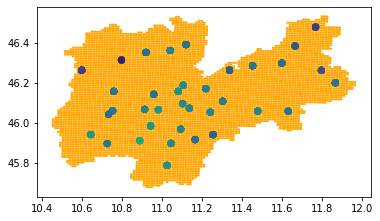

In [5]:
ax = grid.plot(color="orange")
weather.plot(column='maxTemperature',ax=ax)

#Visto che i tweets sono disassociati dalle stazioni, risulta necessario restringersi alla stazione più vicina
# -> Creo database delle stazioni
stations=m_d.orderstation(weather)
stations.head(5)


#Rimane un problema, le temperature non sono svolte
#Spoiler: svolgerle è molto difficile (pandas ha davvero forte limitazioni sulle azioni che fa fare)
#         le soluzioni sono molto non-pythoniche
#Idea migliore: creo una funzione (timesearch) che svolge il tempo per fare in modo che mi trovi temperatura e precipitazioni


# Precipitazioni

In [6]:
#Questo si comporta bene
#Non è utile importare i data availability tendenzialmente
colnames = ['time', 'NO_IDEA', 'intensity(?)']  #Cosa rappresentano questi dati?


dummy=m_d.safe_import('precip')
#Problema: il primo dato vien preso come dizionario
#Converto colonne
dummy=dummy.rename(columns={'201311010000': 'time', "2383": 'NO_IDEA', "1" : 'intensity(?)'})

#Riaggiungo il primo dato
precipitation=appforth(dummy,[201311010000,2383,1])

precipitation

Index(['201311010000', '2383', '1'], dtype='object')


,time,NO_IDEA,intensity(?)
0,201311010000,2383,1
1,201311010020,9452,1
2,201311010020,8278,1
3,201311010020,6871,2
4,201311010020,5689,3
...,...,...,...
3489412,201312260610,745,1
3489413,201312260610,506,1
3489414,201312260610,389,1
3489415,201312260610,393,1


# Electro

## ADMINISTRATIVE REGIONS

Index(['COD_RIP', 'COD_REG', 'COD_PROV', 'PRO_COM', 'PRO_COM_T', 'COMUNE',
       'COMUNE_A', 'CC_P', 'Shape_Leng', 'Shape_Area', 'geometry'],
      dtype='object')


,COD_RIP,COD_REG,COD_PROV,PRO_COM,PRO_COM_T,COMUNE,COMUNE_A,CC_P,Shape_Leng,Shape_Area,geometry
0,1,1,1,1169,001169,Novalesa,None,0,24774.650175,2.855420e+07,"POLYGON ((347021.993 5009818.761, 347042.993 5..."
1,1,1,1,1170,001170,Oglianico,None,0,17006.830647,6.302986e+06,"MULTIPOLYGON (((397768.830 5022935.180, 397883..."
2,1,1,1,1174,001174,Osasio,None,0,13270.436002,4.577087e+06,"POLYGON ((390133.431 4971487.567, 390128.493 4..."
3,1,1,1,1180,001180,Pavarolo,None,0,11459.747350,4.405612e+06,"POLYGON ((408164.103 4993403.404, 408166.884 4..."
4,1,1,1,1181,001181,Pavone Canavese,None,0,18011.757977,1.154000e+07,"POLYGON ((410911.010 5033344.106, 410995.760 5..."


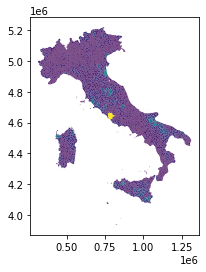

In [8]:
adm_reg=m_d.safe_import('regions')

adm_reg.plot("Shape_Area")
adm_reg.head(5)

<AxesSubplot:>

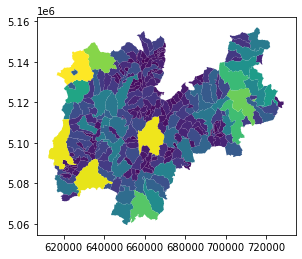

In [9]:
#Convertiamo alla vera patria
adm_reg=adm_reg[adm_reg["COD_PROV"]==22]
adm_reg.plot("Shape_Area")

## NOTE PER RIALLACCIARE I DATI:
I dati vanno riallacciati mediante appropriata conversione, dovrò
1) Discretizzare il tempo, scegliere un tempo base per fare un binning dei dati  \
2) Collegare tramite la grid i dati ad un punto del plot  (binning su posizioni) \
3) Svolgo la divisione in minuti della tabella weather, dovrò abbastanza binnare comunque \
4) Svolgo i tweets vanno binnati agli intervalli temporali

Alt: creo una funzione temperatura che sia continua (connetto linearmente punti distanti 15 minuti, non dovrebbero cambiar molto), e poi tratto il tempo continuo

# Unione di Databases
Passo 1: creare un database dei tweets; a ogni tweet associo tempo atmosferico e temperatura \

Il tempo viene binnato in 30 minuti (mediamente abbiamo sui 20 tweets all'ora), visto che i dati sono ottenuti ogni 10 o 15 perderei informazioni ma per i tweets uso diretto il valore dalla tabella)

In [ ]:
col=["month","day","hours","temperature", "rain" ]
#Visto che l'ora di tempo non è una quantità che correla a qualcosa di ciclico effettivamente misurabile*, ha poco senso
#separare ore e minuti ed quindi tanto vale trattarli insieme
#*Assumeremo eventi quali la campanella dei ragazzi delle superiori non influenzi in maniera importante i dati

Tw_final=pd.DataFrame(columns=col)

N=len(tweets["created"])  #Numero tweets

for i in range(0,N):
    #Inizializzo riga o crasha
    Tw_final.loc[i]="NaN"
    
    #Tempo
    #Tw_final.loc[i]["year"]=int(tweets.loc[i]["created"][0:4])  #Chemmifrega dell'anno, tutti uguali
    Tw_final.loc[i]["month"]=int(tweets.loc[i]["created"][5:7])
    Tw_final.loc[i]["day"]=int(tweets.loc[i]["created"][8:10])
    Tw_final.loc[i]["hours"]=int(tweets.loc[i]["created"][11:13])+0.5*(int(tweets.loc[i]["created"][14:16])>=30)
    
    
    # Temperatura e precipitazioni
    # per ricavare queste usiamo la stazione più vicina al tweet
    # (sfortunamente il Trentino non ne ha tante, fortunatamente sono distribuite bene)
    dmin=10000000000
    staz="NaN"

    for idx,stt in stations.iterrows():
        d=tweets.loc[i]["geometry"].distance(stt["geometry"])
        if(d<dmin):
            dmin=d
            staz=stt["station"]
    
    Tw_final.loc[i]["temperature"]=m_d.find_temperature(weather, Tw_final.loc[i]["month"],
                                                        Tw_final.loc[i]["day"], Tw_final.loc[i]["hours"], staz)
    Tw_final.loc[i]["rain"]=m_d.find_precipitation(weather, Tw_final.loc[i]["month"],
                                                    Tw_final.loc[i]["day"], Tw_final.loc[i]["hours"], staz)
    
Tw_final

0.0
0.0
0.5
0.5
0.5
0.5
0.5
1.0
1.5
1.0
1.5
1.5
2.0
2.0
2.5
4.5
0.5
0.5
0.5
7.5
8.0
8.0
8.5
8.5
9.0
9.0
9.0
9.5
9.5
9.5
9.5
10.0
10.0
10.0
10.5
11.0
11.0
10.5
10.5
10.5
10.5
11.0
11.0
11.0
11.0
10.5
11.5
11.5
11.5
11.5
11.5
11.5
11.5
11.5
11.5
11.5
11.5
11.5
11.5
11.5
11.5
11.5
12.5
12.5
13.5
12.0
12.0
10.0
12.5
12.5
12.5
12.5
12.5
12.5
12.5
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.5
13.5
13.5
13.5
14.0
13.5
13.5
13.5
13.5
13.5
13.5
13.5
14.0
14.5
14.5
14.5
14.0
14.0
14.0
14.0
14.0
14.0
14.5
14.5
15.0
14.5
15.0
15.0
15.0
15.0
15.0
15.0
15.0
15.5
15.5
15.5
15.5
15.5
7.5
15.0
15.5
15.5
16.0
16.0
15.0
16.5
16.5
16.5
16.5
16.5
16.5
17.0
17.0
17.0
17.0
7.5
17.0
17.0
17.0
17.0
17.0
17.0
17.0
17.0
17.5
17.5
17.5
17.5
17.5
17.5
17.5
17.5
17.5
17.5
18.5
13.5
18.0
17.0
18.0
18.0
18.0
18.0
18.0
18.0
18.0
18.0
17.5
17.5
17.5
18.5
18.5
18.5
18.5
18.5
18.5
18.5
18.5
18.5
18.5
19.5
19.5
19.0
1.5
19.0
19.0
19.0
19.0
19.0
19.0
19.5
19.5
19.5
20.0
20.0
22.0
20.0
19.5
20.0
20.0
20.0
20.0

In [ ]:
#Salviamo infine il database

#Tw_final.to_csv('data\processed\twitter_final.csv')
#Tw_final.to_csv('twitter_final.csv')

In [ ]:
#print(list(Tw_final["temperature"]))

In [ ]:
plt.figure(figsize = (18,7))

plt.plot(tweets.groupby("language").count())